In [20]:
import py2neo
import pandas as pd

graph = py2neo.Graph()

data = graph.data("MATCH (f:Field)<-[:DECLARES]-(c:Class)-[:DECLARES]->(m:Method), (m)-[r:READS|WRITES]->(f) RETURN m.name, f.name, r.lineNumber")
df = pd.DataFrame(data)
df['hit'] = 1
df.head()

,f.name,m.name,r.lineNumber,hit
0,duration,getPrincipalFee,49,1
1,duration,extend,24,1
2,duration,extend,24,1
3,duration,<init>,18,1
4,dailyRate,getPrincipalFee,49,1


In [21]:
matrix = df.drop_duplicates().pivot(index="m.name", columns="f.name", values="hit").fillna(0)
matrix

f.name,customer,dailyRate,date,duration,fees
m.name,,,,,
<init>,1.0,1.0,1.0,1.0,1.0
addFee,0.0,0.0,0.0,0.0,1.0
extend,0.0,0.0,0.0,1.0,0.0
extendForWeek,1.0,1.0,1.0,0.0,0.0
getAdditionalFees,0.0,0.0,0.0,0.0,1.0
getPrincipalFee,1.0,1.0,0.0,1.0,0.0


In [22]:
from sklearn.metrics.pairwise import cosine_distances

dissimilarity_matrix = cosine_distances(matrix)
dissimilarity_matrix[:5,:5]

array([[ 0.        ,  0.5527864 ,  0.5527864 ,  0.22540333,  0.5527864 ],
       [ 0.5527864 ,  0.        ,  1.        ,  1.        ,  0.        ],
       [ 0.5527864 ,  1.        ,  0.        ,  1.        ,  1.        ],
       [ 0.22540333,  1.        ,  1.        ,  0.        ,  1.        ],
       [ 0.5527864 ,  0.        ,  1.        ,  1.        ,  0.        ]])

In [23]:
from sklearn.manifold import MDS

# uses a fixed seed for random_state for reproducibility
model = MDS(dissimilarity='precomputed', random_state=0)
dissimilarity_2d = model.fit_transform(dissimilarity_matrix)
dissimilarity_2d[:5]

array([[ 0.01921689,  0.12978066],
       [ 0.3465834 , -0.43509102],
       [-0.5699487 , -0.06500858],
       [ 0.09208679,  0.49470377],
       [ 0.3478405 , -0.43414008]])

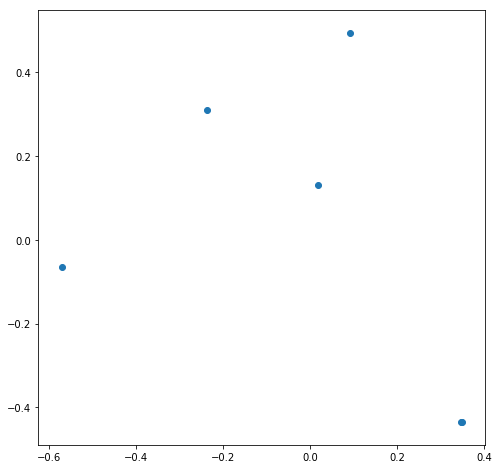

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
x = dissimilarity_2d[:,0]
y = dissimilarity_2d[:,1]
plt.scatter(x, y);